In [42]:
import sys, os, astropy
sys.path.append('../../luseepy')
#print(sys.path)
#kernel_name = os.path.basename(sys.executable.replace("/bin/python",""))
#print(kernel_name)
import lusee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from    lusee.LunarCalendar  import LunarCalendar
import  astropy.units   as u
from    astropy.time import Time

In [2]:
night = 2600
import  astropy.units   as u
obs = lusee.LObservation(night, deltaT_sec=3600)

/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 31 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/astro/u/bsaliwanc/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Text(0.5, 1.0, 'Celestial Positions in LuSEE First Night 2026')

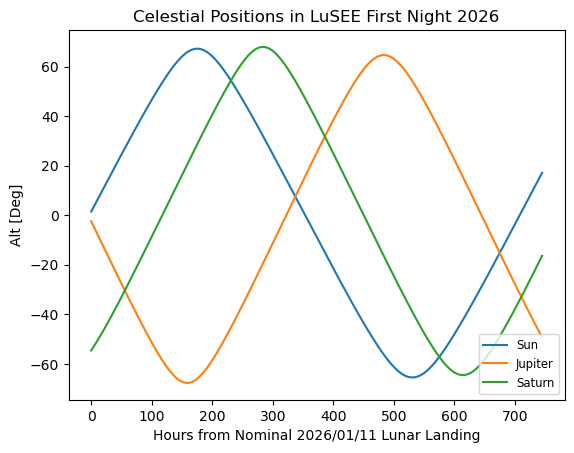

In [3]:
#Plot sun, jupiter, and saturn altitude on LuSEE's first day on the moon
deltaT=3600 #In seconds
obs = lusee.LObservation('2026-01-11 00:00:00 to 2026-02-11 00:00:00',deltaT_sec=deltaT)
alt, az = obs.get_track_solar('sun')
plt.plot(alt*180/np.pi, label='Sun')
altj, azj = obs.get_track_solar('jupiter')
plt.plot(altj*180/np.pi, label='Jupiter')
altj, azj = obs.get_track_solar('saturn')
plt.plot(altj*180/np.pi, label='Saturn')
plt.legend(loc="lower right", fontsize="small")
plt.xlabel("Hours from Nominal 2026/01/11 Lunar Landing")
plt.ylabel("Alt [Deg]")
plt.title("Celestial Positions in LuSEE First Night 2026")

In [13]:
#Calculate remaining daylight on first day from nominal landing of Jan 11th 2026

from    lusee.LunarCalendar  import LunarCalendar
lc = LunarCalendar()
time_start, time_end = lc.get_lunar_start_end(2511)
daylight_remaining = np.where(alt<0)[0][0]-1
print("Start Time of Nominal Landing Day: ", time_start)
print("End Time of Nominal Landing Day: ",time_end)
day_length = time_end - time_start
print("Length of day: ", (day_length*(deltaT)/3600), "hrs")

totsec = daylight_remaining*deltaT
hours = totsec//3600
minutes = (totsec%3600)//60
sec =(totsec%3600)%60 
print("Daylight remaining after nominal landing: %d hrs %d min %d sec" %(hours,minutes,sec))

Start Time of Nominal Landing Day:  2025-12-19 21:02:44.449598
End Time of Nominal Landing Day:  2026-01-18 11:42:13.312113
Length of day:  29.610750723556475 hrs
Daylight remaining after nominal landing: 14 hrs 0 min 0 sec


Text(0.5, 1.0, 'Celestial Positions in LuSEE First Night 2026')

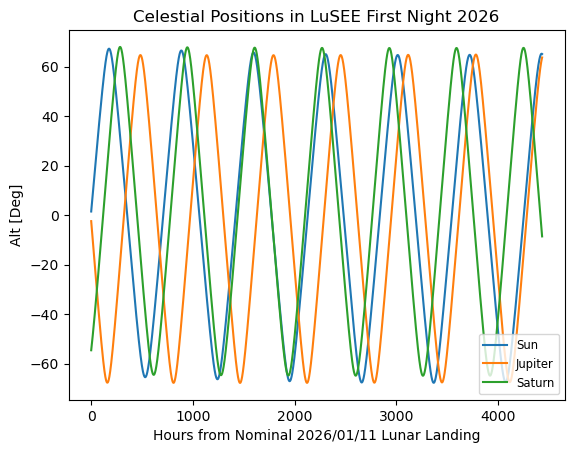

In [14]:
#Plot celestial object altitudes for first 6 lunar nights

deltaT=3600 #In seconds
obs = lusee.LObservation('2026-01-11 00:00:00 to 2026-07-14 14:34:00',deltaT_sec=deltaT)
alt, az = obs.get_track_solar('sun')
plt.plot(alt*180/np.pi, label='Sun')
altj, azj = obs.get_track_solar('jupiter')
plt.plot(altj*180/np.pi, label='Jupiter')
altj, azj = obs.get_track_solar('saturn')
plt.plot(altj*180/np.pi, label='Saturn')
plt.legend(loc="lower right", fontsize="small")
plt.xlabel("Hours from Nominal 2026/01/11 Lunar Landing")
plt.ylabel("Alt [Deg]")
plt.title("Celestial Positions in LuSEE First Night 2026")

In [69]:
#Get day end times for first 6 lunar nights
#Times are in hours
#Option to print values for diagnostics

landing_date = datetime(2026, 1, 11, 0)
lunar_days = [2511, 2600, 2601, 2602, 2603, 2604, 2605]
print_noons = True

noons = np.zeros(len(lunar_days))
for n, day in enumerate(lunar_days): 
    time_start, time_end = lc.get_lunar_start_end(day)
    noons[n] = round((time_end-Time(landing_date)).to_value(format='sec', subfmt='long')/3600)

if print_noons:
    for n, noon in enumerate(noons):
        print("Noon", n, ":", noon, "hrs")

Noon 0 : 180.0 hrs
Noon 1 : 890.0 hrs
Noon 2 : 1600.0 hrs
Noon 3 : 2309.0 hrs
Noon 4 : 3016.0 hrs
Noon 5 : 3724.0 hrs
Noon 6 : 4431.0 hrs


Text(0.5, 1.0, "Celestial Transits During LuSEE's First Six Lunar Nights")

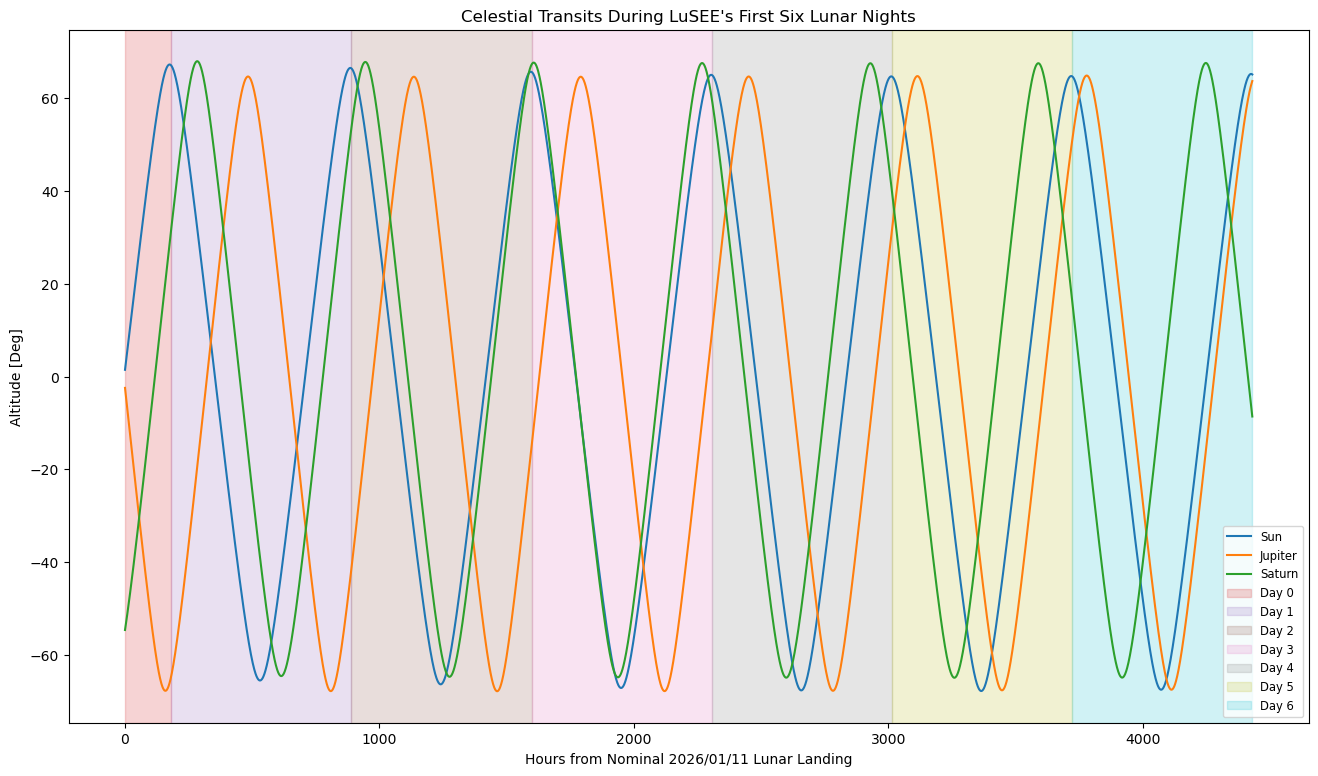

In [74]:
fig, ax = plt.subplots(figsize=(16,9))

alt, az = obs.get_track_solar('sun')
plt.plot(alt*180/np.pi, label='Sun')
altj, azj = obs.get_track_solar('jupiter')
plt.plot(altj*180/np.pi, label='Jupiter')
altj, azj = obs.get_track_solar('saturn')
plt.plot(altj*180/np.pi, label='Saturn')

shade_alpha = 0.2
for n, noon in enumerate(noons):
    if n == 0:
        ax.axvspan(0, noons[n], alpha=shade_alpha, color=next(ax._get_lines.prop_cycler)['color'], label=('Day 0')) 
    else:
        ax.axvspan(noons[n-1], noons[n], alpha=shade_alpha, color=next(ax._get_lines.prop_cycler)['color'], label=('Day '+str(n)))    

plt.legend(loc="lower right", fontsize="small")
plt.xlabel("Hours from Nominal 2026/01/11 Lunar Landing")
plt.ylabel("Altitude [Deg]")
plt.title("Celestial Transits During LuSEE's First Six Lunar Nights")

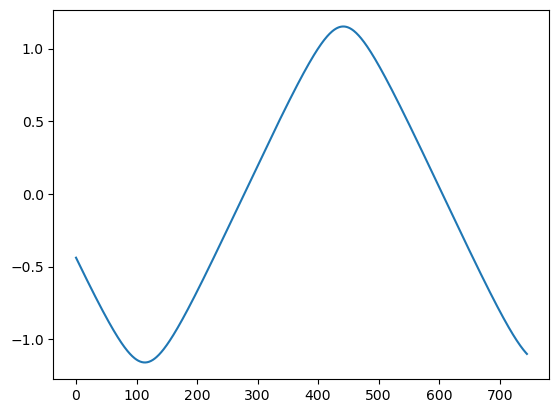

In [5]:
# for each lunar night plot the crab altitude
crab_ra, crab_dec = '05h34m31.94s', '+22d00m52.2s'
alt, az = obs.get_track_solar('sun')
w=np.where(alt<0)
altr, azr = obs.get_track_ra_dec(ra=crab_ra, dec=crab_dec)
plt.plot(altr)
    

In [6]:
## examples of alt day specficiations

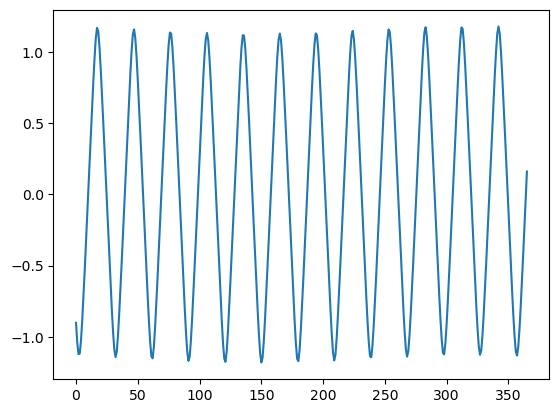

In [7]:
obs = lusee.LObservation('CY26',deltaT_sec=3600*24)
alt, az = obs.get_track_solar('sun')
plt.plot(alt)

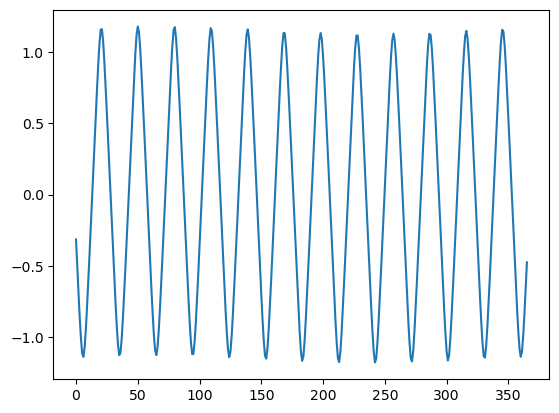

In [8]:
obs = lusee.LObservation('FY2026',deltaT_sec=3600*24)
alt, az = obs.get_track_solar('sun')
plt.plot(alt)

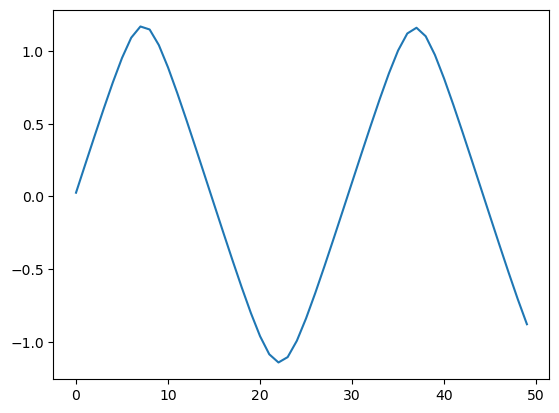

In [9]:
obs = lusee.LObservation('2026-01-11 00:00:00 to 2026-03-01 00:00:00',deltaT_sec=3600*24)
alt, az = obs.get_track_solar('sun')
plt.plot(alt)